In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
file_path = r'C:\Users\Gen\Documents\FDM datasets\bank_customer.csv'
data = pd.read_csv(file_path,encoding='latin-1')

In [3]:
data.head()

,Unnamed: 0,ID,Gender,Month_Income,Age,Region_Code,Occupation,Credit_Score,Loan_Status,Existing_Credit_Cards,Avg_Account_Balance,Account_Category,Tenure_with_Bank,Lead_Outcome
0,0,VBENBARO,Male,96345.0,29,254,Other,623,Yes,4,742366,X1,2,No
1,1,CCMEWNKY,Male,85640.0,43,268,Other,629,NaN,0,925537,X2,1,No
2,2,VK3KGA9M,Male,96345.0,31,270,Salaried,357,No,0,215949,X1,1,No
3,3,TT8RPZVC,Male,85640.0,29,272,Other,356,No,0,868070,X1,3,No
4,4,SHQZEYTZ,Female,42820.0,29,270,Other,572,No,0,657087,X1,3,No


In [4]:
cols_with_na = data.columns[data.isna().any()].tolist()
print(f'Columns with NA values: {cols_with_na}')

Columns with NA values: ['Month_Income', 'Occupation', 'Loan_Status']


In [5]:
# Replace specific placeholders with NaN
data['Occupation'].replace(['Unknown', '', '?'], pd.NA, inplace=True)

#Replace the unknown values with the mode
data.fillna({'Occupation': data['Occupation'].mode()[0]}, inplace=True)

C:\Users\Gen\AppData\Local\Temp\ipykernel_12036\3123462378.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Occupation'].replace(['Unknown', '', '?'], pd.NA, inplace=True)


In [6]:
# Replace specific placeholders with NaN
data['Loan_Status'].replace(['Unknown', '', '?'], pd.NA,inplace=True)

#Replace the unknown values with the mode
data.fillna({'Loan_Status': data['Loan_Status'].mode()[0]}, inplace=True)

C:\Users\Gen\AppData\Local\Temp\ipykernel_12036\418708650.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Loan_Status'].replace(['Unknown', '', '?'], pd.NA,inplace=True)


In [7]:
data.head()

,Unnamed: 0,ID,Gender,Month_Income,Age,Region_Code,Occupation,Credit_Score,Loan_Status,Existing_Credit_Cards,Avg_Account_Balance,Account_Category,Tenure_with_Bank,Lead_Outcome
0,0,VBENBARO,Male,96345.0,29,254,Other,623,Yes,4,742366,X1,2,No
1,1,CCMEWNKY,Male,85640.0,43,268,Other,629,No,0,925537,X2,1,No
2,2,VK3KGA9M,Male,96345.0,31,270,Salaried,357,No,0,215949,X1,1,No
3,3,TT8RPZVC,Male,85640.0,29,272,Other,356,No,0,868070,X1,3,No
4,4,SHQZEYTZ,Female,42820.0,29,270,Other,572,No,0,657087,X1,3,No


In [8]:
data['Month_Income'].replace(['Unknown', '', '?'], pd.NA, inplace=True)

data.fillna({'Month_Income': data['Month_Income'].astype(float).mean()}, inplace=True)


C:\Users\Gen\AppData\Local\Temp\ipykernel_12036\2319119024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Month_Income'].replace(['Unknown', '', '?'], pd.NA, inplace=True)


In [9]:
cols_with_na = data.columns[data.isna().any()].tolist()
print(f'Columns with NA values: {cols_with_na}')

Columns with NA values: []


In [10]:
data.drop(['ID','Region_Code'], axis=1, inplace=True)

In [11]:
data['Lead_Outcome'].value_counts()

Lead_Outcome
No     63605
Yes    41395
Name: count, dtype: int64

In [12]:
data.head(2)

,Unnamed: 0,Gender,Month_Income,Age,Occupation,Credit_Score,Loan_Status,Existing_Credit_Cards,Avg_Account_Balance,Account_Category,Tenure_with_Bank,Lead_Outcome
0,0,Male,96345.0,29,Other,623,Yes,4,742366,X1,2,No
1,1,Male,85640.0,43,Other,629,No,0,925537,X2,1,No


In [13]:
data['Tenure_with_Bank'].value_counts()

Tenure_with_Bank
5     16492
2     12796
1     12754
3     12747
4     12667
11     3844
9      3811
7      3803
13     3801
10     3792
15     3725
12     3725
6      3712
8      3688
14     3643
Name: count, dtype: int64

In [14]:
def Tenure_with_Bank_meth(years):
    if years == 1:
        return years
    else:
        if years == 2:
            return years
        if years == 3:
            return years
        if years == 4:
            return years  
        if years == 5:
            return years 
        if years>5 and years<=10:
            return '5 to 10'
        else:
            return 'more than 10 years'

data['Tenure_with_Bank']=data['Tenure_with_Bank'].apply(Tenure_with_Bank_meth)

data['Tenure_with_Bank'].value_counts()

Tenure_with_Bank
5 to 10               18806
more than 10 years    18738
5                     16492
2                     12796
1                     12754
3                     12747
4                     12667
Name: count, dtype: int64

In [15]:
data['Tenure_with_Bank'] = data['Tenure_with_Bank'].apply(str)

In [16]:
data['Loan_Status'].value_counts()

Loan_Status
No     73920
Yes    31080
Name: count, dtype: int64

In [17]:
data['Existing_Credit_Cards'].value_counts()

Existing_Credit_Cards
0    73920
3     7418
4     4370
6     4329
7     4271
5     4259
1     3263
2     3170
Name: count, dtype: int64

In [18]:
def Existing_Credit_Cards_meth(no):
    if no == 0:
        return 'None'
    else:
        return 'One Or More'
        
data['Existing_Credit_Cards']=data['Existing_Credit_Cards'].apply(Existing_Credit_Cards_meth)
data['Existing_Credit_Cards'].value_counts()
        

Existing_Credit_Cards
None           73920
One Or More    31080
Name: count, dtype: int64

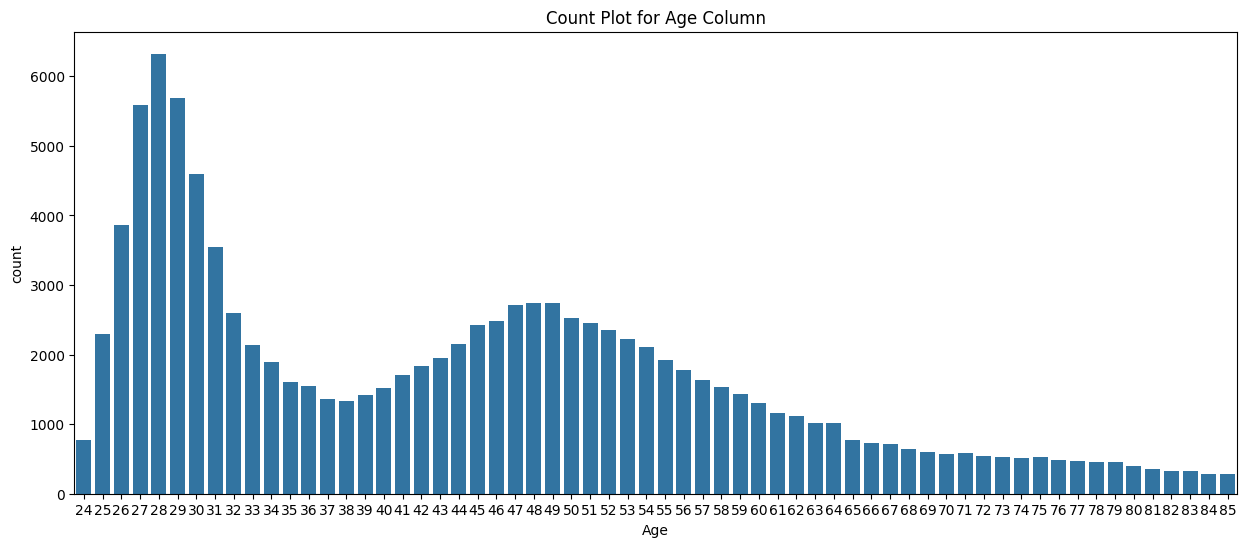

In [19]:

plt.figure(figsize=(15, 6))
sns.countplot(x='Age', data=data)
plt.title('Count Plot for Age Column')
plt.show()

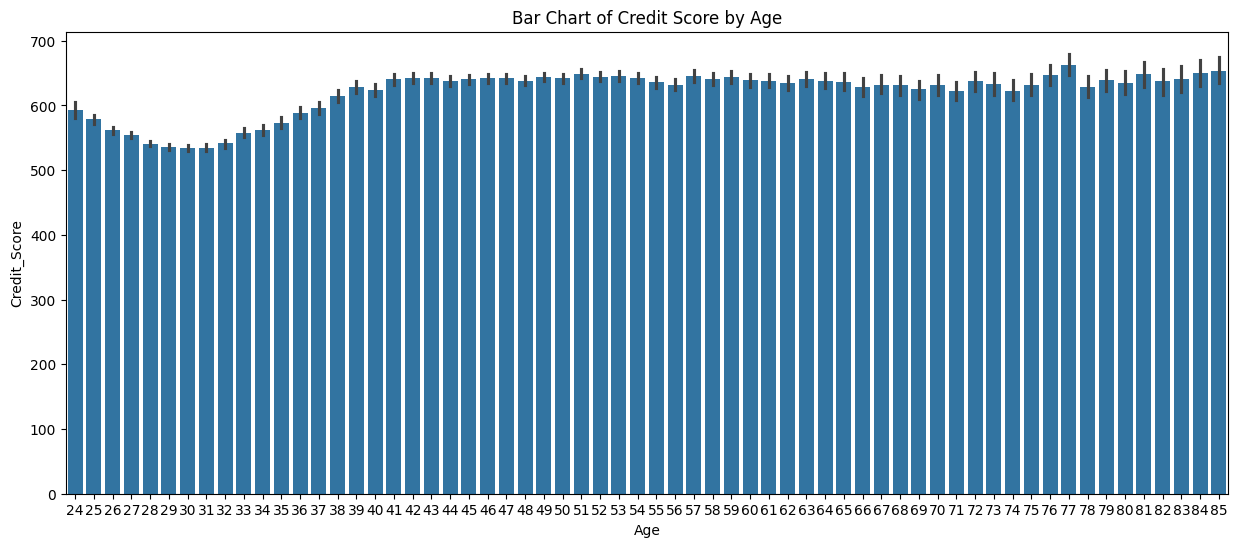

In [20]:

plt.figure(figsize=(15, 6))
sns.barplot(x='Age', y='Credit_Score', data=data)
plt.title('Bar Chart of Credit Score by Age')
plt.show()



In [21]:
 # # Encode categorical variables using label encoding
 # label_encoders = {}
 # categorical_columns = ['Gender', 'Occupation', 'Loan_Status', 'Account_Category', 'Lead_Outcome','Tenure_with_Bank','Existing_Credit_Cards']

In [22]:
 # for col in categorical_columns:
 #     le = LabelEncoder()
 #     data[col] = le.fit_transform(data[col])
 #     label_encoders[col] = le

In [23]:
data['Lead_Outcome']=data['Lead_Outcome'].apply(lambda x : 1 if x=='Yes' else 0) 

In [24]:
data = pd.get_dummies(data)

In [25]:
print(data.columns)


Index(['Unnamed: 0', 'Month_Income', 'Age', 'Credit_Score',
       'Avg_Account_Balance', 'Lead_Outcome', 'Gender_Female', 'Gender_Male',
       'Occupation_Entrepreneur', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Loan_Status_No', 'Loan_Status_Yes',
       'Existing_Credit_Cards_None', 'Existing_Credit_Cards_One Or More',
       'Account_Category_X1', 'Account_Category_X2', 'Account_Category_X3',
       'Account_Category_X4', 'Tenure_with_Bank_1', 'Tenure_with_Bank_2',
       'Tenure_with_Bank_3', 'Tenure_with_Bank_4', 'Tenure_with_Bank_5',
       'Tenure_with_Bank_5 to 10', 'Tenure_with_Bank_more than 10 years'],
      dtype='object')


In [26]:
data.head()

,Unnamed: 0,Month_Income,Age,Credit_Score,Avg_Account_Balance,Lead_Outcome,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,...,Account_Category_X2,Account_Category_X3,Account_Category_X4,Tenure_with_Bank_1,Tenure_with_Bank_2,Tenure_with_Bank_3,Tenure_with_Bank_4,Tenure_with_Bank_5,Tenure_with_Bank_5 to 10,Tenure_with_Bank_more than 10 years
0,0,96345.0,29,623,742366,0,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
1,1,85640.0,43,629,925537,0,False,True,False,True,...,True,False,False,True,False,False,False,False,False,False
2,2,96345.0,31,357,215949,0,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,3,85640.0,29,356,868070,0,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,4,42820.0,29,572,657087,0,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False


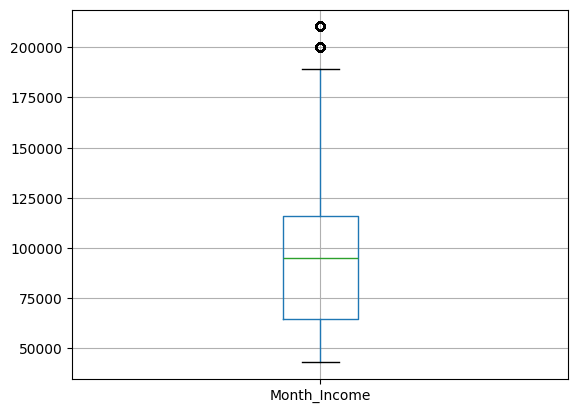

In [27]:
import matplotlib.pyplot as plt

# Create a box plot
data.boxplot(column='Month_Income')
plt.show()

In [28]:
# Calculate the IQR for the 'Month_Income' column
Q1 = data['Month_Income'].quantile(0.25)
Q3 = data['Month_Income'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering the dataset
data_filtered = data[(data['Month_Income'] >= lower_bound) & (data['Month_Income'] <= upper_bound)]

# Verify that outliers have been removed
print(f"Original number of rows: {len(data)}")
print(f"Number of rows after removing outliers: {len(data_filtered)}")


Original number of rows: 105000
Number of rows after removing outliers: 99096


In [29]:
x = data.drop('Lead_Outcome', axis=1)
y = data['Lead_Outcome']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

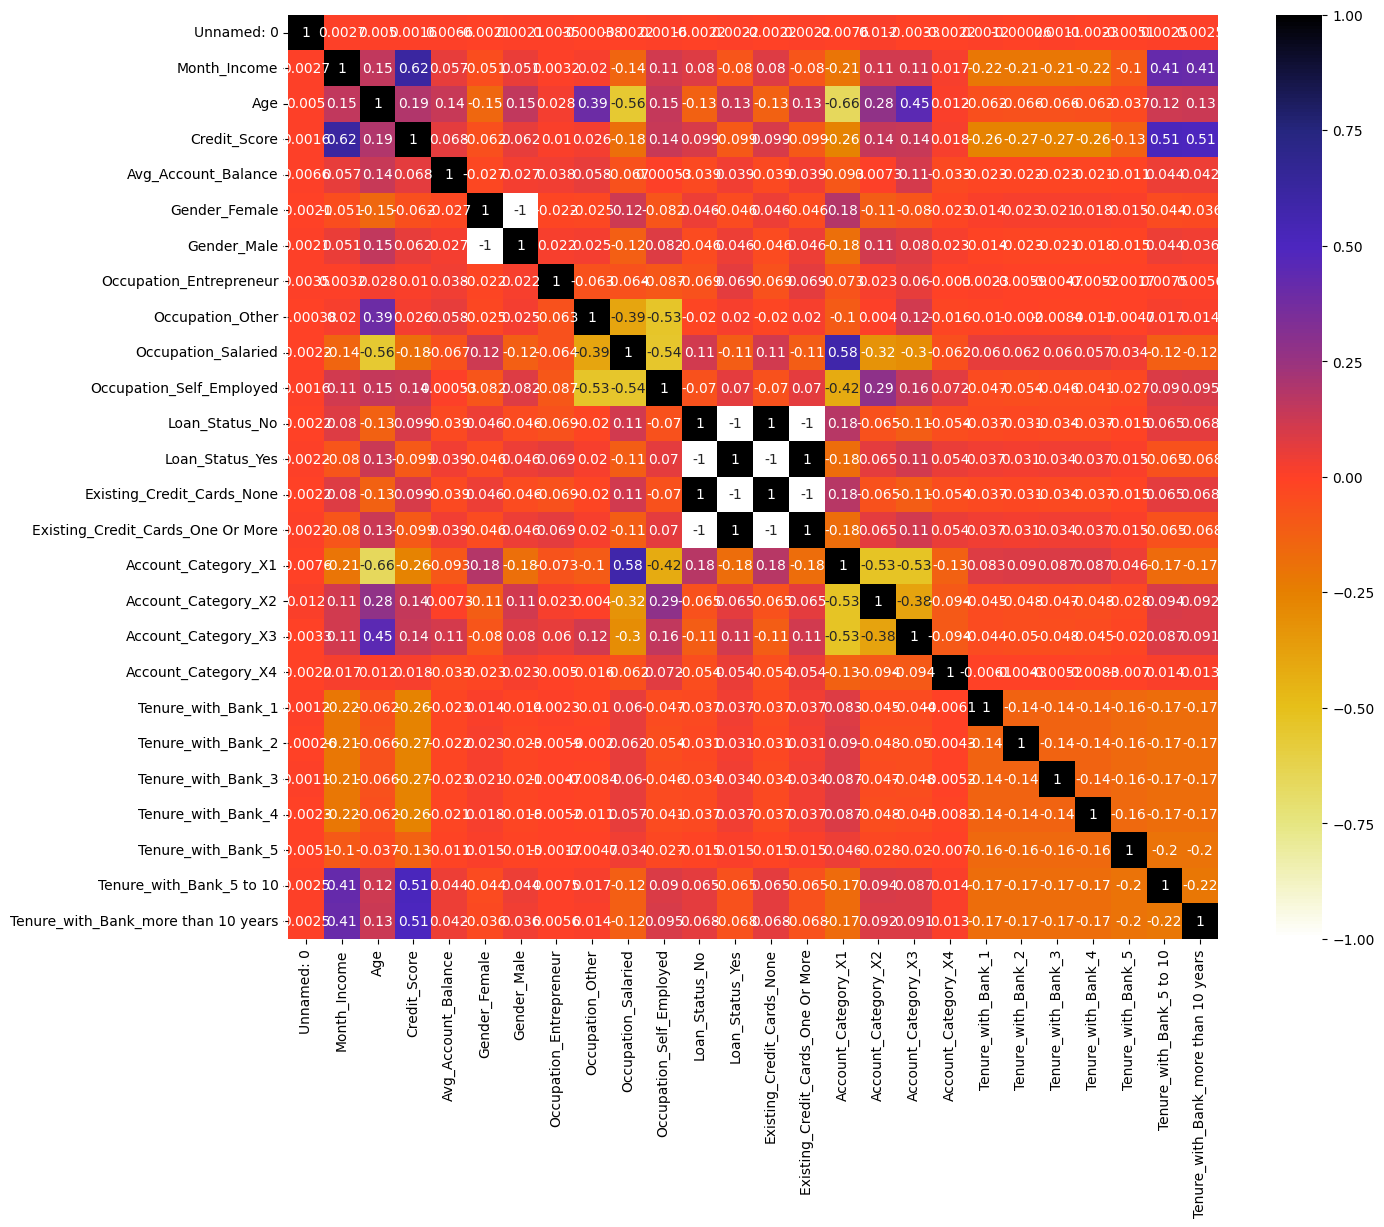

In [31]:
import seaborn as sns
plt.figure(figsize=(15,12))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [32]:
print(f"Training samples: {len(x_train)}, Testing samples: {len(x_test)}")

Training samples: 84000, Testing samples: 21000


In [33]:
print(f"Training Target: {len(y_train)}, Testing Target: {len(y_test)}")

Training Target: 84000, Testing Target: 21000


In [34]:
#check each model accuracy one by one
def model_acc(model):
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [35]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
model_acc(kn)

KNeighborsClassifier() --> 0.8557142857142858


In [42]:
from sklearn.svm import SVC
classifier = SVC()
model_acc(classifier)

SVC() --> 0.8732380952380953


In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
model_acc(classifier)

LogisticRegression() --> 0.7520476190476191


c:\Users\Gen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
predicted = kn.predict(x_test)

In [38]:
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[12078,   715],
       [ 2315,  5892]], dtype=int64)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = mean_squared_error(y_test, predicted, squared=False)
r2 = r2_score(y_test, predicted)

print("Regression Report:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Regression Report:
Mean Absolute Error (MAE): 0.1442857142857143
Mean Squared Error (MSE): 0.1442857142857143
Root Mean Squared Error (RMSE): 0.37984959429452375
R-squared (R2): 0.393954696670611


c:\Users\Gen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
pred_value = kn.predict([[0, 80000, 30, 800, 80000, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]])
if pred_value[0] == 1:
    print("Interest")
else:
    print("No Interest")

Interest


c:\Users\Gen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
